In [ ]:
# This notebook is for conformance analysis. It is separated from the main analysis since this
# module is stand-alone. However, the source code is derived from the group project and hence
# share the same analysis up to the beginning of conformance analysis.  -- Hardy K. S. Leung

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install pm4py

import pm4py
from pm4py.objects.log.importer.xes import importer as xes_importer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pm4py.visualization.petri_net import visualizer as pn_visualizer

In [ ]:
international_log = pm4py.read_xes('/content/drive/MyDrive/CMPE-255_Data Mining/Project/InternationalDeclarations.xes')

parsing log, completed traces ::   0%|          | 0/6449 [00:00<?, ?it/s]

In [ ]:
international_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72151 entries, 0 to 72150
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype              
---  ------                            --------------  -----              
 0   id                                72151 non-null  object             
 1   org:resource                      72151 non-null  object             
 2   concept:name                      72151 non-null  object             
 3   time:timestamp                    72151 non-null  datetime64[ns, UTC]
 4   org:role                          72151 non-null  object             
 5   case:Permit travel permit number  72151 non-null  object             
 6   case:DeclarationNumber            72151 non-null  object             
 7   case:Amount                       72151 non-null  float64            
 8   case:RequestedAmount              72151 non-null  float64            
 9   case:Permit TaskNumber            72151 non-null  object     

In [ ]:
domestic_log = pm4py.read_xes('/content/drive/MyDrive/CMPE-255_Data Mining/Project/DomesticDeclarations.xes.gz')

parsing log, completed traces ::   0%|          | 0/10500 [00:00<?, ?it/s]

#Domestic Preprocessing

In [ ]:
clean_domestic = domestic_log[domestic_log['case:DeclarationNumber'] != 'UNKNOWN']
clean_domestic['case:DeclarationNumber'].value_counts()
# clean_domestic.info()

declaration number 113463    24
declaration number 142450    18
declaration number 108211    18
declaration number 100972    17
declaration number 137337    17
                             ..
declaration number 86792      4
declaration number 140676     3
declaration number 95150      3
declaration number 141396     3
declaration number 87503      1
Name: case:DeclarationNumber, Length: 10048, dtype: int64

In [ ]:
clean_domestic = clean_domestic[(clean_domestic['org:role'] != 'MISSING')]

In [ ]:
clean_domestic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55087 entries, 0 to 56436
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   id                      55087 non-null  object             
 1   org:resource            55087 non-null  object             
 2   concept:name            55087 non-null  object             
 3   time:timestamp          55087 non-null  datetime64[ns, UTC]
 4   org:role                55087 non-null  object             
 5   case:id                 55087 non-null  object             
 6   case:concept:name       55087 non-null  object             
 7   case:BudgetNumber       55087 non-null  object             
 8   case:DeclarationNumber  55087 non-null  object             
 9   case:Amount             55087 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(1), object(8)
memory usage: 4.6+ MB


In [ ]:
clean_domestic['time:timestamp'].value_counts()

2018-12-20 16:31:28+00:00    177
2018-12-13 16:31:07+00:00    148
2018-06-07 15:31:35+00:00    146
2018-07-12 15:31:18+00:00    144
2018-06-21 15:31:07+00:00    142
                            ... 
2018-03-23 08:11:41+00:00      1
2018-05-21 10:17:30+00:00      1
2018-05-23 09:40:36+00:00      1
2018-05-25 06:47:55+00:00      1
2019-01-08 07:20:28+00:00      1
Name: time:timestamp, Length: 44072, dtype: int64

In [ ]:
clean_domestic['time:timestamp'].describe()

<ipython-input-12-4a8799c5006b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  clean_domestic['time:timestamp'].describe()


count                         55087
unique                        44072
top       2018-12-20 16:31:28+00:00
freq                            177
first     2017-01-09 08:49:50+00:00
last      2019-06-17 15:30:58+00:00
Name: time:timestamp, dtype: object

In [ ]:
clean_domestic['concept:name'].value_counts()

Declaration SUBMITTED by EMPLOYEE             11166
Declaration FINAL_APPROVED by SUPERVISOR      10102
Payment Handled                               10043
Request Payment                               10036
Declaration APPROVED by ADMINISTRATION         8142
Declaration APPROVED by BUDGET OWNER           2812
Declaration REJECTED by EMPLOYEE               1047
Declaration REJECTED by ADMINISTRATION          722
Declaration APPROVED by PRE_APPROVER            679
Declaration REJECTED by SUPERVISOR              213
Declaration REJECTED by PRE_APPROVER             77
Declaration REJECTED by BUDGET OWNER             45
Declaration SAVED by EMPLOYEE                     2
Declaration FOR_APPROVAL by ADMINISTRATION        1
Name: concept:name, dtype: int64

In [ ]:
clean_domestic['org:resource'].value_counts()

STAFF MEMBER    35008
SYSTEM          20079
Name: org:resource, dtype: int64

In [ ]:
clean_domestic['id'].value_counts

<bound method IndexOpsMixin.value_counts of 0                 st_step 86794_0
1                 st_step 86793_0
2         dd_declaration 86791_19
3         dd_declaration 86791_20
4                 st_step 86798_0
                   ...           
56432            st_step 138363_0
56433            st_step 138361_0
56434            st_step 138362_0
56435    dd_declaration 138359_19
56436    dd_declaration 138359_20
Name: id, Length: 55087, dtype: object>

In [ ]:
clean_domestic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55087 entries, 0 to 56436
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   id                      55087 non-null  object             
 1   org:resource            55087 non-null  object             
 2   concept:name            55087 non-null  object             
 3   time:timestamp          55087 non-null  datetime64[ns, UTC]
 4   org:role                55087 non-null  object             
 5   case:id                 55087 non-null  object             
 6   case:concept:name       55087 non-null  object             
 7   case:BudgetNumber       55087 non-null  object             
 8   case:DeclarationNumber  55087 non-null  object             
 9   case:Amount             55087 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(1), object(8)
memory usage: 4.6+ MB



# Domestic Visualization


## Conformance Analysis

In [ ]:
dir = '/content/drive/MyDrive/CMPE-255_Data Mining'

In [ ]:
# The following procedure computer the "size" of the process tree as a
# measure for its complexity, which is a reasonable assumption

def process_tree_size(p):
  count = 1
  for c in p.children:
    count += process_tree_size(c)
  return count

In [ ]:
# This function takes a log, and a variable k, and build a process tree/petri-net
# based on the top k variants. We'll then extract the total fitness based on
# token-based-replay (TBR), as well as the model complexity simply as the number
# of nodes in the process tree (as an approximation). The fitness (f) and size
# (size) will be returned;

def conformance_tradeoff(log, k):
  k_domestic = pm4py.filter_variants_top_k(log, k)
  process_tree = pm4py.discover_process_tree_inductive(k_domestic)
  size = process_tree_size(process_tree)
  net, initial_marking, final_marking = pm4py.convert_to_petri_net(process_tree)
  replayed_traces = pm4py.conformance_diagnostics_token_based_replay(
      clean_domestic, net, initial_marking, final_marking)
  
  fit_count = 0
  for t in replayed_traces:
    if t['trace_is_fit']:
      fit_count += 1
  f = float(fit_count) / len(replayed_traces)
  print(f"k = {k}, size = {size}, f = {f}")
  return size, f

# This function performs the experiment on all k in the given range;

def conformance_experiment(log, maxK):
  ks = []
  sizes = []
  fs = []
  for k in range(1, maxK):
    size, f = conformance_tradeoff(log, k)
    ks.append(k)
    sizes.append(size)
    if f == 0:
      fs.append(fs[-1])
    else:
      fs.append(f)

  return ks, fs, sizes

In [ ]:
# This function plot the conformance experiment

import matplotlib.pyplot as plt
def conformance_plot(ks, fs, sizes, title):
    
  fig, ax = plt.subplots(figsize=(12, 9))
  ax.plot(ks, fs, color="red")
  ax.set_ylabel("Total Fitness", color="red", fontsize=20)
  plt.legend()
  plt.xlim(0, 20)
  plt.xlabel('Top k Variants', fontsize=20)
  plt.title(f'Fitness and Complexity vs #Variants ({title})', fontsize=20)
  plt.xticks([0, 5, 10, 15, 20])
  plt.yticks([0, .2, .4, .6, .8, 1], ['0%', '20%', '40%', '60%', '80%', '100%'])

  ax2 = ax.twinx()
  ax2.plot(ks, sizes, label="Model Complexity", color="blue")
  ax2.set_ylabel("Model Complexity (Size)", color="blue", fontsize=20)

  plt.show()
  plt.savefig(f'{dir}/tradeoff_{title}.pdf', dpi=300)

In [ ]:
# setup to conduct either experiments

def conformance_all_domestic():
  ks, fs, sizes = conformance_experiment(clean_domestic, 70)
  conformance_plot(ks, fs, sizes, 'domestic')

def conformance_all_international():
  ks, fs, sizes = conformance_experiment(clean_international, 70)
  conformance_plot(ks, fs, sizes, 'international')

replaying log with TBR, completed variants ::   0%|          | 0/68 [00:00<?, ?it/s]

k = 1, size = 6, f = 0.7057125796178344


replaying log with TBR, completed variants ::   0%|          | 0/68 [00:00<?, ?it/s]

k = 2, size = 9, f = 0.7057125796178344


replaying log with TBR, completed variants ::   0%|          | 0/68 [00:00<?, ?it/s]

k = 3, size = 12, f = 0.9014729299363057


replaying log with TBR, completed variants ::   0%|          | 0/68 [00:00<?, ?it/s]

k = 4, size = 14, f = 0.9014729299363057


replaying log with TBR, completed variants ::   0%|          | 0/68 [00:00<?, ?it/s]

k = 5, size = 18, f = 0.961484872611465


replaying log with TBR, completed variants ::   0%|          | 0/68 [00:00<?, ?it/s]

k = 6, size = 18, f = 0.961484872611465


replaying log with TBR, completed variants ::   0%|          | 0/68 [00:00<?, ?it/s]

k = 7, size = 22, f = 0.9781050955414012


replaying log with TBR, completed variants ::   0%|          | 0/68 [00:00<?, ?it/s]

k = 8, size = 23, f = 0.9848726114649682


replaying log with TBR, completed variants ::   0%|          | 0/68 [00:00<?, ?it/s]

k = 9, size = 23, f = 0.9848726114649682


replaying log with TBR, completed variants ::   0%|          | 0/68 [00:00<?, ?it/s]

k = 10, size = 29, f = 0.9895501592356688


replaying log with TBR, completed variants ::   0%|          | 0/68 [00:00<?, ?it/s]

k = 11, size = 29, f = 0.9895501592356688


replaying log with TBR, completed variants ::   0%|          | 0/68 [00:00<?, ?it/s]

k = 12, size = 29, f = 0.9895501592356688


replaying log with TBR, completed variants ::   0%|          | 0/68 [00:00<?, ?it/s]

k = 13, size = 31, f = 0.0


replaying log with TBR, completed variants ::   0%|          | 0/68 [00:00<?, ?it/s]

k = 14, size = 34, f = 0.0


replaying log with TBR, completed variants ::   0%|          | 0/68 [00:00<?, ?it/s]

k = 15, size = 34, f = 0.0


replaying log with TBR, completed variants ::   0%|          | 0/68 [00:00<?, ?it/s]

k = 16, size = 36, f = 0.0


replaying log with TBR, completed variants ::   0%|          | 0/68 [00:00<?, ?it/s]

k = 17, size = 50, f = 0.9956210191082803


replaying log with TBR, completed variants ::   0%|          | 0/68 [00:00<?, ?it/s]

k = 18, size = 54, f = 0.996218152866242


replaying log with TBR, completed variants ::   0%|          | 0/68 [00:00<?, ?it/s]

k = 19, size = 54, f = 0.996218152866242


replaying log with TBR, completed variants ::   0%|          | 0/68 [00:00<?, ?it/s]

k = 20, size = 54, f = 0.996218152866242


replaying log with TBR, completed variants ::   0%|          | 0/68 [00:00<?, ?it/s]

k = 21, size = 32, f = 0.0


replaying log with TBR, completed variants ::   0%|          | 0/68 [00:00<?, ?it/s]

k = 22, size = 32, f = 0.0


replaying log with TBR, completed variants ::   0%|          | 0/68 [00:00<?, ?it/s]

k = 23, size = 32, f = 0.0


replaying log with TBR, completed variants ::   0%|          | 0/68 [00:00<?, ?it/s]

k = 24, size = 32, f = 0.0


replaying log with TBR, completed variants ::   0%|          | 0/68 [00:00<?, ?it/s]

k = 25, size = 34, f = 0.0


replaying log with TBR, completed variants ::   0%|          | 0/68 [00:00<?, ?it/s]

k = 26, size = 34, f = 0.0


replaying log with TBR, completed variants ::   0%|          | 0/68 [00:00<?, ?it/s]

k = 27, size = 34, f = 0.0


replaying log with TBR, completed variants ::   0%|          | 0/68 [00:00<?, ?it/s]

k = 28, size = 34, f = 0.0


replaying log with TBR, completed variants ::   0%|          | 0/68 [00:00<?, ?it/s]

k = 29, size = 34, f = 0.0


replaying log with TBR, completed variants ::   0%|          | 0/68 [00:00<?, ?it/s]

k = 30, size = 34, f = 0.0


replaying log with TBR, completed variants ::   0%|          | 0/68 [00:00<?, ?it/s]

k = 31, size = 36, f = 0.0


replaying log with TBR, completed variants ::   0%|          | 0/68 [00:00<?, ?it/s]

k = 32, size = 36, f = 0.0


replaying log with TBR, completed variants ::   0%|          | 0/68 [00:00<?, ?it/s]

k = 33, size = 47, f = 0.9998009554140127


replaying log with TBR, completed variants ::   0%|          | 0/68 [00:00<?, ?it/s]

k = 34, size = 47, f = 0.9998009554140127


replaying log with TBR, completed variants ::   0%|          | 0/68 [00:00<?, ?it/s]

k = 35, size = 47, f = 0.9998009554140127


replaying log with TBR, completed variants ::   0%|          | 0/68 [00:00<?, ?it/s]

k = 36, size = 47, f = 0.9998009554140127


replaying log with TBR, completed variants ::   0%|          | 0/68 [00:00<?, ?it/s]

k = 37, size = 47, f = 0.9998009554140127


replaying log with TBR, completed variants ::   0%|          | 0/68 [00:00<?, ?it/s]

k = 38, size = 47, f = 0.9998009554140127


replaying log with TBR, completed variants ::   0%|          | 0/68 [00:00<?, ?it/s]

k = 39, size = 47, f = 0.9998009554140127


replaying log with TBR, completed variants ::   0%|          | 0/68 [00:00<?, ?it/s]

k = 40, size = 47, f = 0.9998009554140127


replaying log with TBR, completed variants ::   0%|          | 0/68 [00:00<?, ?it/s]

k = 41, size = 47, f = 0.9998009554140127


replaying log with TBR, completed variants ::   0%|          | 0/68 [00:00<?, ?it/s]

k = 42, size = 47, f = 0.9998009554140127


replaying log with TBR, completed variants ::   0%|          | 0/68 [00:00<?, ?it/s]

k = 43, size = 47, f = 0.9998009554140127


replaying log with TBR, completed variants ::   0%|          | 0/68 [00:00<?, ?it/s]

k = 44, size = 47, f = 0.9998009554140127


replaying log with TBR, completed variants ::   0%|          | 0/68 [00:00<?, ?it/s]

k = 45, size = 52, f = 0.9998009554140127


replaying log with TBR, completed variants ::   0%|          | 0/68 [00:00<?, ?it/s]

k = 46, size = 52, f = 0.9998009554140127


replaying log with TBR, completed variants ::   0%|          | 0/68 [00:00<?, ?it/s]

k = 47, size = 52, f = 0.9998009554140127


replaying log with TBR, completed variants ::   0%|          | 0/68 [00:00<?, ?it/s]

k = 48, size = 52, f = 0.9998009554140127


replaying log with TBR, completed variants ::   0%|          | 0/68 [00:00<?, ?it/s]

k = 49, size = 52, f = 0.9998009554140127


replaying log with TBR, completed variants ::   0%|          | 0/68 [00:00<?, ?it/s]

k = 50, size = 52, f = 0.9998009554140127


replaying log with TBR, completed variants ::   0%|          | 0/68 [00:00<?, ?it/s]

k = 51, size = 52, f = 0.9998009554140127


replaying log with TBR, completed variants ::   0%|          | 0/68 [00:00<?, ?it/s]

k = 52, size = 52, f = 0.9998009554140127


replaying log with TBR, completed variants ::   0%|          | 0/68 [00:00<?, ?it/s]

k = 53, size = 52, f = 0.9998009554140127


replaying log with TBR, completed variants ::   0%|          | 0/68 [00:00<?, ?it/s]

k = 54, size = 52, f = 0.9998009554140127


replaying log with TBR, completed variants ::   0%|          | 0/68 [00:00<?, ?it/s]

k = 55, size = 52, f = 0.9998009554140127


replaying log with TBR, completed variants ::   0%|          | 0/68 [00:00<?, ?it/s]

k = 56, size = 52, f = 0.9998009554140127


replaying log with TBR, completed variants ::   0%|          | 0/68 [00:00<?, ?it/s]

k = 57, size = 52, f = 0.9998009554140127


replaying log with TBR, completed variants ::   0%|          | 0/68 [00:00<?, ?it/s]

k = 58, size = 52, f = 0.9998009554140127


replaying log with TBR, completed variants ::   0%|          | 0/68 [00:00<?, ?it/s]

k = 59, size = 52, f = 0.9998009554140127


replaying log with TBR, completed variants ::   0%|          | 0/68 [00:00<?, ?it/s]

k = 60, size = 52, f = 0.9998009554140127


replaying log with TBR, completed variants ::   0%|          | 0/68 [00:00<?, ?it/s]

k = 61, size = 52, f = 0.9998009554140127


replaying log with TBR, completed variants ::   0%|          | 0/68 [00:00<?, ?it/s]

k = 62, size = 52, f = 0.9998009554140127


replaying log with TBR, completed variants ::   0%|          | 0/68 [00:00<?, ?it/s]

k = 63, size = 52, f = 0.9998009554140127


replaying log with TBR, completed variants ::   0%|          | 0/68 [00:00<?, ?it/s]

k = 64, size = 52, f = 0.9998009554140127


replaying log with TBR, completed variants ::   0%|          | 0/68 [00:00<?, ?it/s]

k = 65, size = 52, f = 0.9998009554140127


replaying log with TBR, completed variants ::   0%|          | 0/68 [00:00<?, ?it/s]

k = 66, size = 52, f = 0.9998009554140127


replaying log with TBR, completed variants ::   0%|          | 0/68 [00:00<?, ?it/s]

k = 67, size = 54, f = 1.0


replaying log with TBR, completed variants ::   0%|          | 0/68 [00:00<?, ?it/s]

k = 68, size = 54, f = 1.0


replaying log with TBR, completed variants ::   0%|          | 0/68 [00:00<?, ?it/s]

k = 69, size = 54, f = 1.0


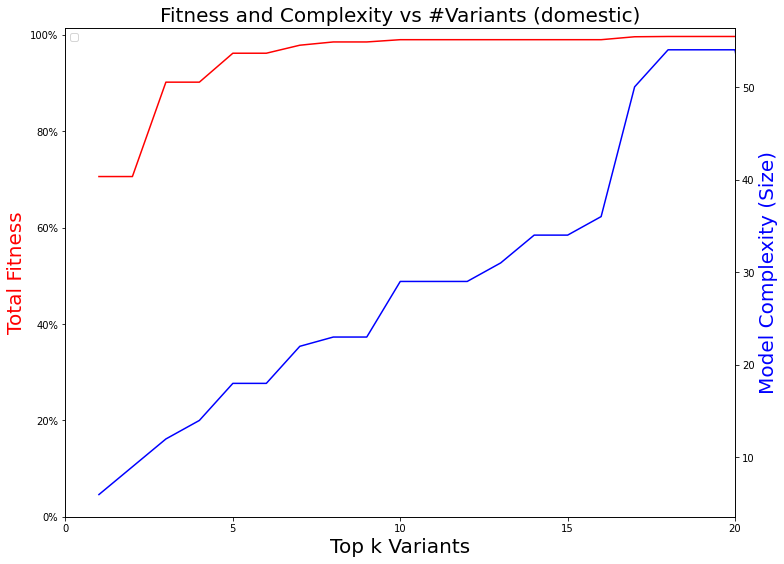

<Figure size 432x288 with 0 Axes>

In [ ]:
conformance_all_domestic()

In [ ]:
def conformance_visualize(log, k, type, save=False):
  filename = f'{dir}/{type}_{k}.png'
  k_domestic = pm4py.filter_variants_top_k(log, k)
  if type == 'process_tree':
    process_tree = pm4py.discover_process_tree_inductive(k_domestic)
    pm4py.view_process_tree(process_tree)
    if save:
      pm4py.save_vis_process_tree(process_tree, filename)
  elif type == 'bpmn':
    process_tree = pm4py.discover_process_tree_inductive(k_domestic)
    bpmn = pm4py.convert_to_bpmn(process_tree)
    pm4py.view_bpmn(bpmn)
    if save:
      pm4py.save_vis_bpmn(bpmn, filename)
  elif type == 'heuristics_net':
    heuristics_net = pm4py.discover_heuristics_net(k_domestic)
    pm4py.view_heuristics_net(heuristics_net)
    if save:
      pm4py.save_vis_heuristics_net(heuristics_net, filename)
  elif type == 'petri_net':
    process_tree = pm4py.discover_process_tree_inductive(k_domestic)
    net, initial_marking, final_marking = pm4py.convert_to_petri_net(process_tree)
    pm4py.view_petri_net(net, initial_marking, final_marking)
    if save:
      pm4py.save_vis_petri_net(net, initial_marking, final_marking, filename)
  else:
    print('ERROR')

/usr/local/lib/python3.8/dist-packages/pm4py/algo/discovery/dfg/adapters/pandas/df_statistics.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[start_timestamp_key] = df[timestamp_key]


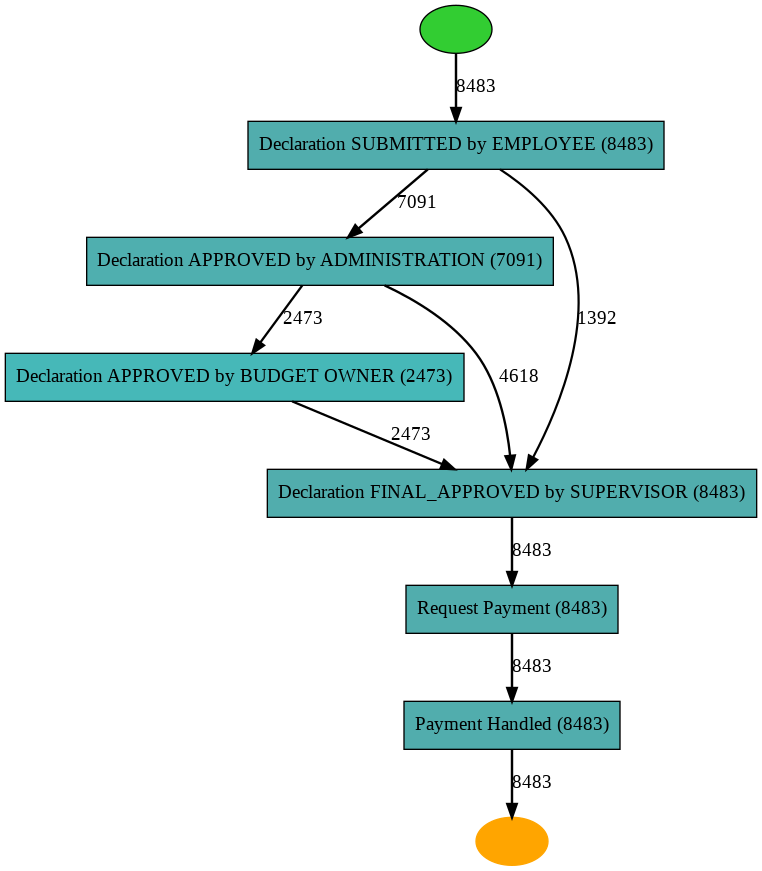

In [ ]:
conformance_visualize(clean_domestic, 3, 'heuristics_net')

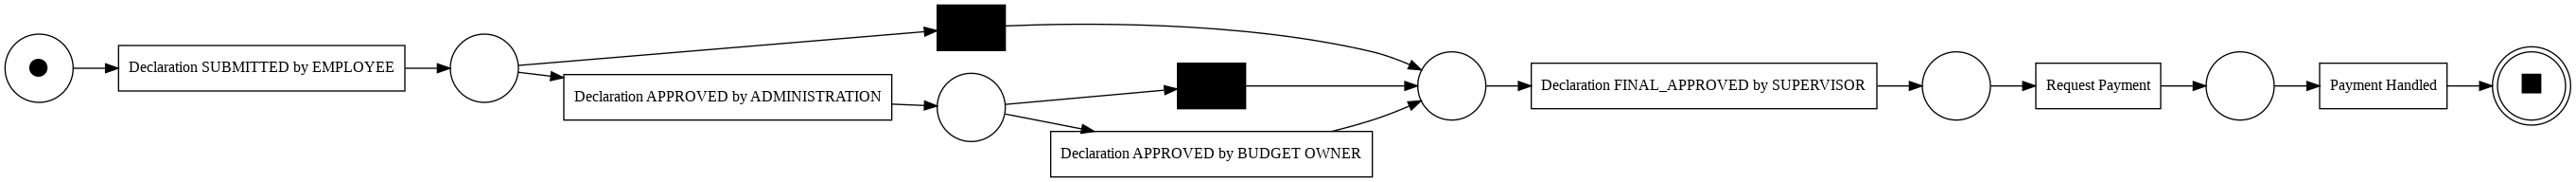

In [ ]:
conformance_visualize(clean_domestic, 3, 'petri_net')

/usr/local/lib/python3.8/dist-packages/pm4py/algo/discovery/dfg/adapters/pandas/df_statistics.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[start_timestamp_key] = df[timestamp_key]


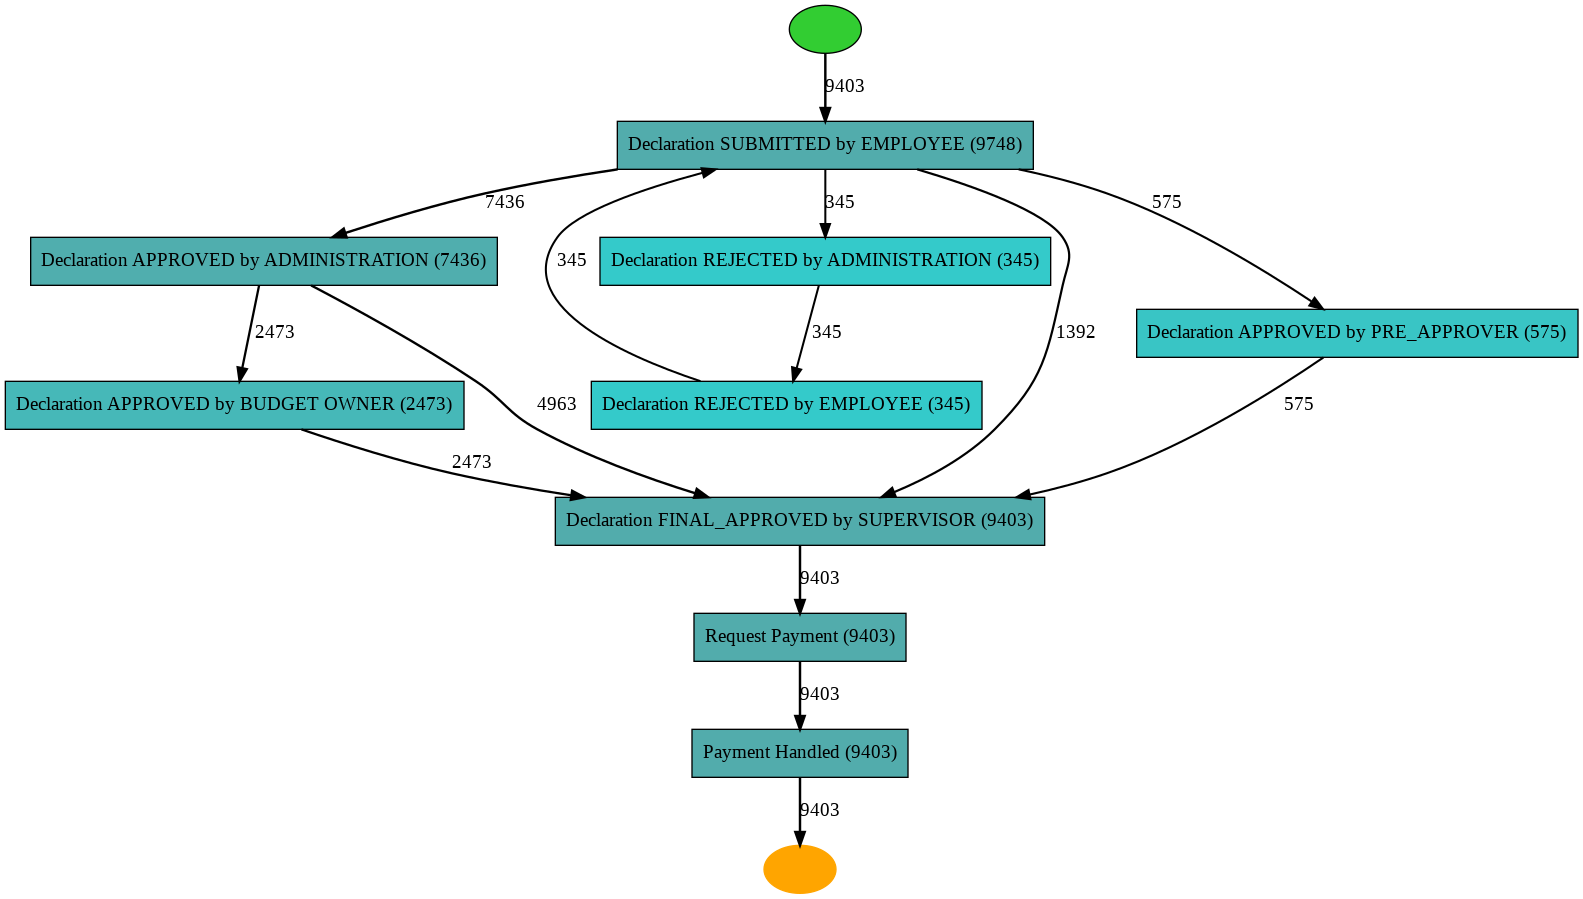

In [ ]:
conformance_visualize(clean_domestic, 5, 'heuristics_net')

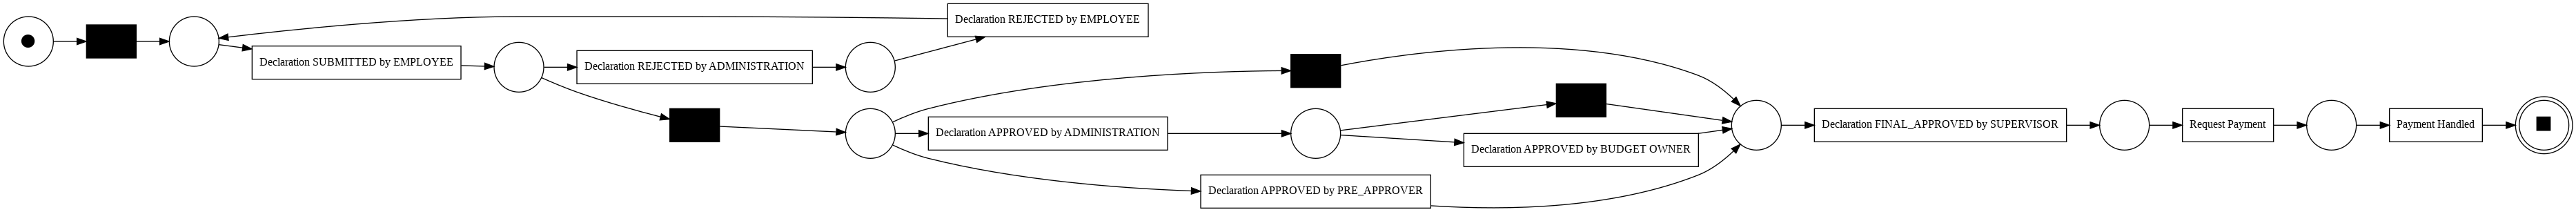

In [ ]:
conformance_visualize(clean_domestic, 5, 'petri_net')

/usr/local/lib/python3.8/dist-packages/pm4py/algo/discovery/dfg/adapters/pandas/df_statistics.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[start_timestamp_key] = df[timestamp_key]


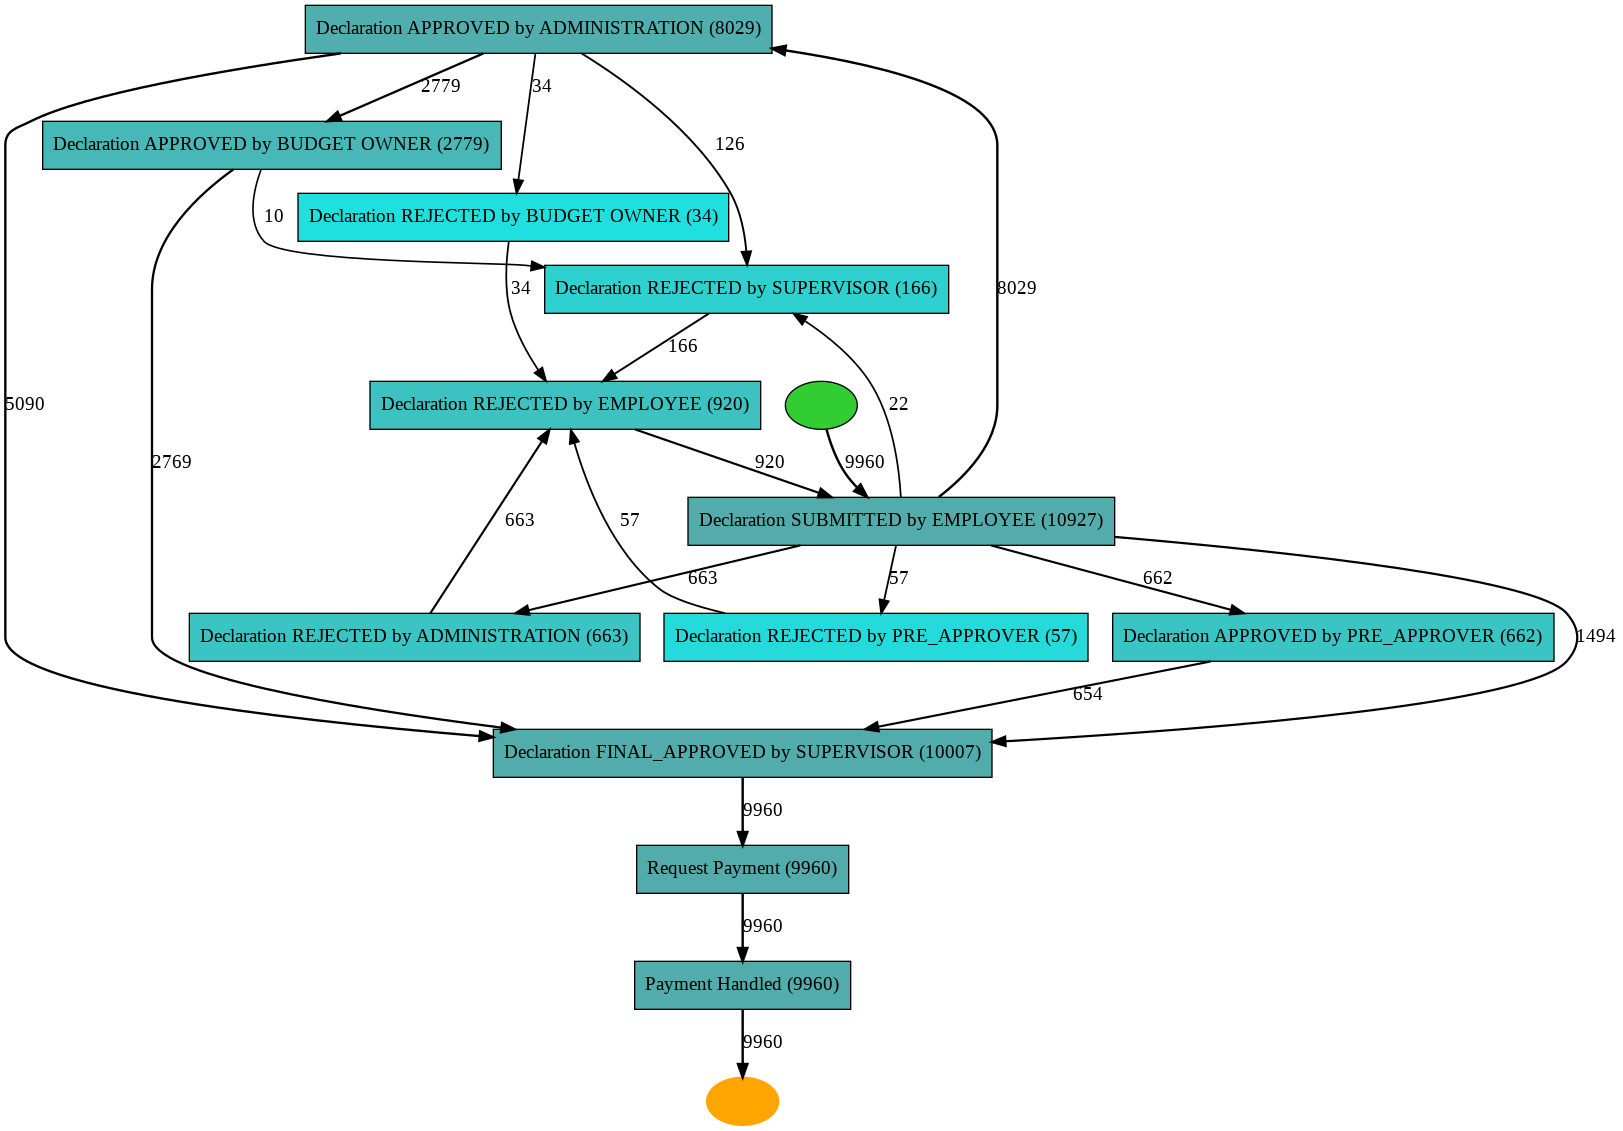

In [ ]:
conformance_visualize(clean_domestic, 18, 'heuristics_net')

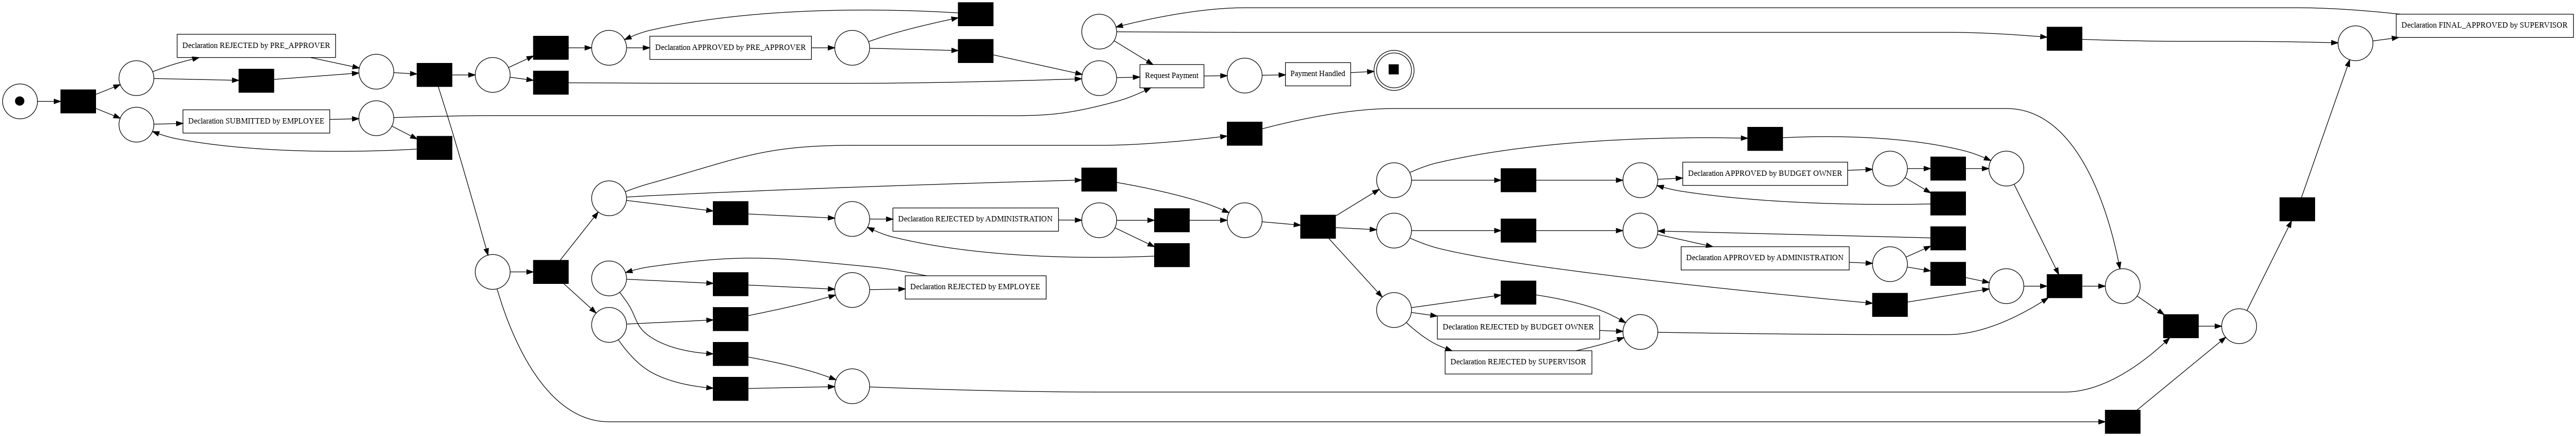

In [ ]:
conformance_visualize(clean_domestic, 18, 'petri_net')